화성의 기본 개념을 다룬다. 음정(interval), 화음(chord), 음계(scale) 등에 대해 설명한다.

> 이 글은 [FMP(Fundamentals of Music Processing) Notebooks](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C0/C0.html)을 참고로 합니다.

In [2]:
from collections import OrderedDict
import numpy as np
import IPython.display as ipd
import pandas as pd

# 음정(Interval)

- 음악에서 음정(interval)은 두 피치(pitch) 사이의 차이로 간단하게 정의될 수 있다. 
- 하지만 이 정의는 피치의 기본 개념이 이미 다소 모호하다는 점에서 문제가 있다. 피치는 주파수 관련 로그 스케일에서 소리의 순서를 지정할 수 있는 지각적(perceptual) 속성이다. 악기에서 특정 피치의 음을 연주할 때, 결과적인 음악 톤은 부분음(partial)이라고 하는 특정 주파수가 지배한다.
- 가장 낮은 부분음의 주파수를 기본 주파수(fundamental freuqency)라고 하며 일반적으로 피치와 관련된 주파수이다. 하모니 소리(harmonic sound)의 경우 부분음은 기본 주파수의 정수 배수인 고조파(harmonics)에 가깝다.

- 음악에서 가장 기본적인 음정은 옥타브이며, 기본 주파수의 절반 또는 두 배인 피치와 다른 피치 사이의 거리로 정의된다.
- 이 기본 음정을 시작으로 고조파의 주파수 관계(물리적 접근), 기하학적 관계(수학적 접근) 또는 음의 관계(음악적 접근)를 고려하여 음정의 개념을 정의할 수 있다. 이러한 접근 방식은 음정에 대해 약간 다른 개념들로 이어지지만, 동일한 "음정 이름"으로 여겨진다.

## 반음 차이 (Semitone Differences)

- **12 평균율 음계**를 가정하면 한 옥타브는 로그 주파수 축에서 등간격으로 배치된 12개의 음계 단계로 세분화 된다.
- 이 음계에서 가능한 가장 작은 간격을 **반음(semitone)** 이라고 하며, 이는 두 개의 연이은 음계 단계 간의 차이이다.
- 주파수 측면에서 반음은 (차이가 아닌) 비율을 나타내며 **센트(cents)** 라는 로그 단위를 사용하여 지정할 수 있다.
- $\omega_1$와 $\omega_2$라고 하는 두 주파수 간의 센트 차이는 다음과 같다.
    - $\log_2\left(\frac{\omega_1}{\omega_2}\right)\cdot 1200.$
- 따라서 평균율 음계에서 반음은 $100$ 센트에 해당한다.

- 반음의 개념을 바탕으로 서양 음악 이론에서 사용되는 서로 다른 음정을 지정할 수 있다. 이러한 음정에 대한 명명은 과거의 관행을 기반으로 한다. 특히, "음정 이름"은 낮은 음과 높은 음 사이의 반음 차이를 설명할 뿐만 아니라 악보 표기법에서 음정을 지정하는 방법도 설명할 수 있다.

- 서로 다른 음표 기호가 동일한 음을 나타낼 수도 있으며, 이는 **이명동음적 상등(enharmonic equivalence)** 으로 알려져 있다. 유사하게, 반음으로 측정될 때(동일 평균율 음계로 가정) 동일한 거리에 해당하는 음악적으로 다른 음정(다른 음정 이름으로 지칭됨) 사이에는 "enharmonic equivalence"이 존재한다. 예를 들어, "augmented unison"과 "minor second"라는 두 개의 음정은 모두 한 반음의 차이를 표현하지만 악보 표기를 사용할 때는 다르게 지정된다.

- 여기서는 음정을 지나치게 단순화되더라도 악보를 무시하고 음정 사이의 거리(반음 단위)로 생각하기로 하자.
- 다음 그림은 가장 일반적인 음정 이름(C4를 낮은 음으로 사용)과 그 의미를 반음 차이($\Delta$로 표시)로 나타낸 것이다.

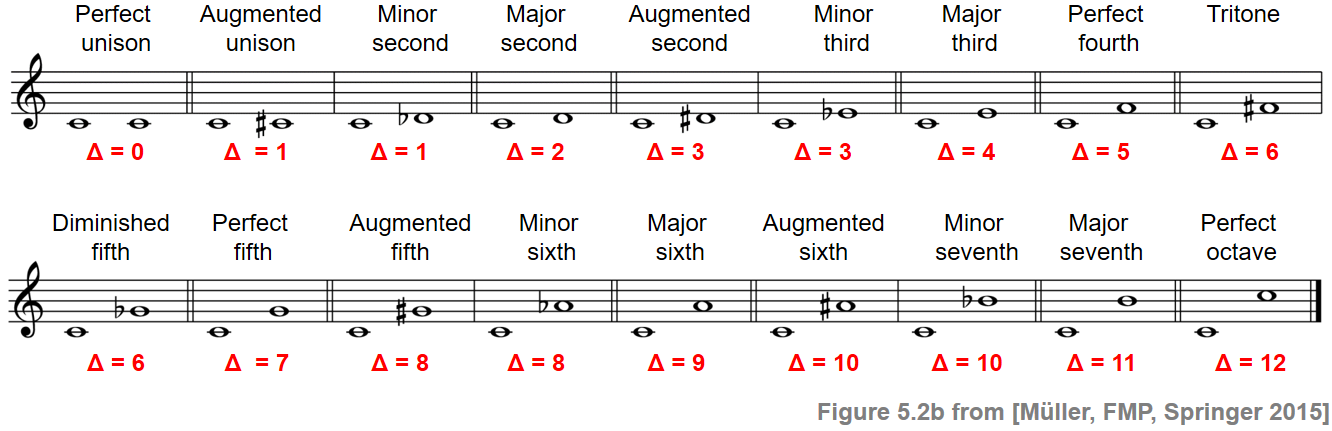

In [20]:
ipd.Image("../img/6.chord_recognition/FMP_C5_F02b.png", width=600)

## 주파수 비율(Frequency Ratios)

- 음정의 개념은 피치의 부분음들 사이에서 자연적으로 발생하는 주파수 관계를 고려하여 물리적인 관점에서 접근할 수 있다. 고조파는 톤의 배음열을 형성하는 기본 주파수의 정수배이다.

- 물리적 접근에서는 동일한 고조파 계열 내에서 발생하는 부분음 간의 주파수 관계에서 음정을 도출한다. 다음 그림은 음표 C2의 고조파 시리즈를 보여준다.

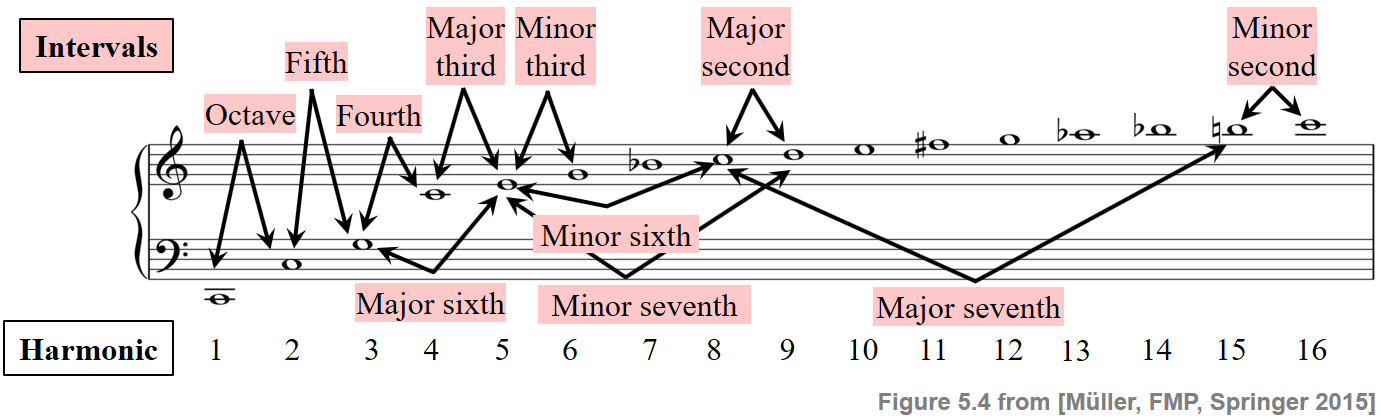

In [21]:
ipd.Image("../img/6.chord_recognition/FMP_C5_F04.png", width=600)

- 예를 들어, 옥타브(octave)는 처음 두 부분음 사이의 음정(interval)이고, 5도(fifth)는 두 번째와 세 번째 부분음 사이의 음정이고, 4도(fourth)는 세 번째와 네 번째 부분음 사이의 음정으로 발생하는 식으로 이어진다.
- 이 관찰은 작은 정수의 비율을 기반으로 하는 음정의 정의로 이어진다. 이렇게 정의된 간격을 **순수**(**pure**) 또는 **단순**(**just**) 음정이라고도 한다. 마찬가지로 고조파에 기반한 음악 조율은 **순정률(pure (or just) intonation)** 으로 알려져 있다.

- 순정률 외에도, 주파수 비율 측면에서 음정을 정의하는 데 사용할 수 있는 더 많은 조율 시스템이 있다. 
- 알려진 가장 오래된 튜닝 시스템은 그리스 철학자이자 수학자 **피타고라스**(기원전 6세기)에 의해 소개되었다. 기하학적 동기가 부여된 **피타고라스 튜닝**은 옥타브의 주파수 비율 $1:2$와 5도의 비율 $2:3$에만 기반한다. 다른 모든 음정은 5도와 옥타브를 적절하게 더하거나 빼서 그 비율에서 얻는다. 이로 인해 **2의 거듭제곱** 또는 **3의 거듭제곱**만 포함하는 주파수 비율로 표현할 수 있는 음정이 생성된다.

- 다음 그림에서는 간격의 다양한 정의와 그 관계를 보여준다. 왼쪽 열부터 보면 반음의 차이($\Delta$), 음정의 이름, C4를 근음(root note)으로 가정한 음정, 순정률에 대한 비율(JI), 피타고라스 비율(Pyt)이 나와있다.

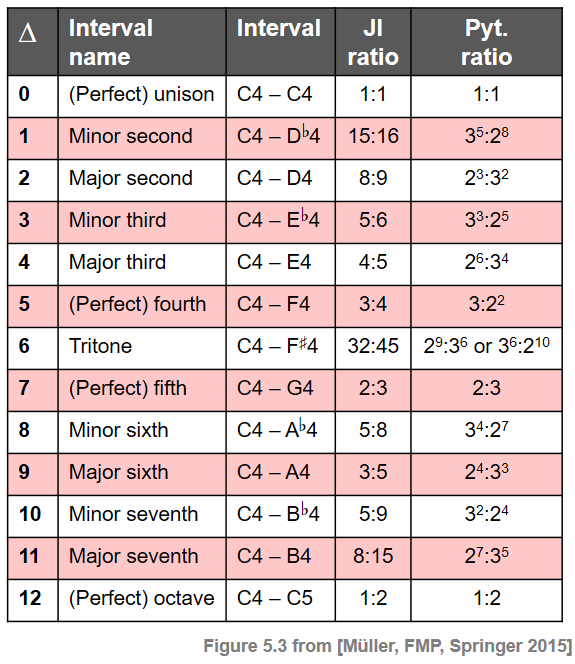

In [22]:
ipd.Image("../img/6.chord_recognition/FMP_C5_F03.png", width=400)

- 다음 코드 셀에서는 평균율(ET), 순음률(JI) 및 피타고라스 튜닝(Pyt)과 관련하여 다양한 음정의 정현파(sinusodial) 음향화(sonification)를 제공한다.
- 또한 ET 기반 및 JI 기반 간격(JI Dev)과 ET 기반 및 Pyt 기반 간격(Pyt Dev) 간의 편차(센트 단위)를 지정한다.

In [23]:
def f_pitch(p):
    frequency = 2 ** ((p - 69) / 12) * 440
    return frequency

diff_semitones = ['0','1','2','3','4','5','6','7','8','9','10','11','12',]

JI_frac = ['$1:1$', '$15:16$', '$8:9$', '$5:6$', '$4:5$', '$3:4$', '$32:45$', 
           '$2:3$', '$5:8$', '$3:5$', '$5:9$', '$8:15$', '$1:2$']
JI_ratio = np.asarray([1, 15/16, 8/9, 5/6, 4/5, 3/4, 32/45, 2/3, 5/8, 3/5, 5/9, 8/15, 1/2])

pyt_frac = ['$1:1$', '$3^5:2^8$', '$2^3:3^2$', '$3^3:2^5$', '$2^6:3^4$', '$3:2^2$', '$2^9:3^6$', 
            '$2:3$', '$3^4:2^7$', '$2^4:3^3$', '$3^2:2^4$', '$2^7:3^5$', '$1:2$']
pyt_ratio = np.asarray([1, 243/256, 8/9, 27/32, 64/81, 3/4, 512/729, 2/3, 81/128, 16/27, 9/16, 128/243, 1/2])

p = 60
omega = f_pitch(p)
freq_JI = omega / JI_ratio 
freq_pyt = omega / pyt_ratio
notes = np.asarray(range(p, p + 13))
freq_center = f_pitch(notes)
freq_deviation_cents_JI =  np.log2(freq_JI / freq_center) * 1200
freq_deviation_cents_pyt =  np.log2(freq_pyt / freq_center) * 1200

duration = 1
Fs = 4000
N = int(duration * Fs)
t = np.arange(0, N) / Fs

def generate_sinusoid(omega, t):
    return np.sin(2 * np.pi * omega * t)

def generate_sinusoid_list(freq_list, x_ref=[]):
    sinusoid_list = []
    for f in freq_list:
        s = generate_sinusoid(f, t)
        x = np.concatenate((x_ref, s))
        sinusoid_list.append(x)
    return sinusoid_list

x_ref = generate_sinusoid(omega, t)
sinusoid_center = generate_sinusoid_list(freq_center, x_ref)
sinusoid_JI = generate_sinusoid_list(freq_JI, x_ref)
sinusoid_pyt = generate_sinusoid_list(freq_pyt, x_ref) 

# Generation of html table
def generate_audio_tag_html_list(sinusoid_list, Fs):
    audio_tag_html_list = []
    for i in range(len(sinusoid_list)):
        audio_tag = ipd.Audio( sinusoid_list[i], rate=Fs)
        audio_tag_html = audio_tag._repr_html_().replace('\n', '').strip()
        audio_tag_html = audio_tag_html.replace('<audio ', 
                                                '<audio style="width: 110px; height: 30px;"')  
        audio_tag_html_list.append(audio_tag_html)
    return audio_tag_html_list

audio_tag_html_center = generate_audio_tag_html_list(sinusoid_center, Fs=Fs)
audio_tag_html_JI = generate_audio_tag_html_list(sinusoid_JI, Fs=Fs)
audio_tag_html_pyt = generate_audio_tag_html_list(sinusoid_pyt, Fs=Fs)

In [24]:
pd.options.display.float_format = '{:,.1f}'.format    
pd.set_option('display.max_colwidth', None)    
df = pd.DataFrame(OrderedDict([
    ('$\Delta$', diff_semitones),
    ('Interval name', ['(Perfect) unison','Minor second','Major second','Minor Third',
                       'Major Third','(Perfect) fourth', 'Tritone','(Perfect) fifth',
                       'Minor sixth','Major sixth','Minor seventh','Major seventh','(Perfect) octave']),
    ('&emsp;Interval', ['C4&ndash;C4','C4&ndash;C$^\sharp$4','C4&ndash;D4',
                        'C4&ndash;D$^\sharp$4','C4&ndash;E4','C4&ndash;F4',
                        'C4&ndash;F$^\sharp$4','C4&ndash;G4','C4&ndash;G$^\sharp$4',
                        'C4&ndash;A4','C4&ndash;A$^\sharp$4', 'C4&ndash;B4','C4&ndash;C4']),
    ('ET Sinusoid', audio_tag_html_center), 
    ('&emsp;&emsp; JI Ratio', JI_frac),     
    ('JI Sinusoid', audio_tag_html_JI),
    ('JI Dev', freq_deviation_cents_JI),
    ('&emsp;&emsp; Pyt Ratio', pyt_frac),    
    ('Pyt Sinusoid', audio_tag_html_pyt),                                   
    ('Pyt Dev', freq_deviation_cents_pyt)]))

df.index = np.arange(1, len(df) + 1)
ipd.HTML(df.to_html(escape=False, index=False))

## 협화음과 불협화음 (Consonance and Dissonance)

- 조화 부분음(harmonic partials)에 기초한 순정률을 사용하여, $1:1$(1도; unison), $1:2$(옥타브; octave), $2:3$(5도), 또는 $3:4$(4도)와 같은 작은 정수 비로 특정 음정이 설명될 수 있음을 보았다.
- 이러한 음정은 고조파 시리즈의 배음에서 자연스럽게 나타나며 대체로 일관되고 만족스러운(pleasant) 것으로 인식된다.

- 보다 일반적으로 사용되는 **협화음(consonance)** 이라는 용어는 동시에 연주될 때 대부분의 사람들에게 듣기 좋게 들리는 음의 조합을 의미한다. 반대로 **불협화음(dissonance)** 이라는 용어는 거칠거나 불쾌하게 들리는 음의 조합을 가리키는 데 사용된다. 협화음은 불안정한 것으로 간주되는 불협화음(전이 특성을 가짐)과 달리 안정적인 것으로 간주된다.

- 협화음과 불협화음의 정의는 음악적, 물리적, 지각적 기준에 따라 다양하다.

- 음정의 경우, 1도, 옥타브, 5도, 4도는 일반적으로 **완전(perfect)** 협화음으로 간주된다. 따라서 이러한 음정을 **완전음정(perfect interval)** 이라고도 한다.
- 장3도(major thirds)와 단3도(minor thirds), 장6도(major sixths)와 단6도(minor sixth)는 여전히 협화음으로 인식되지만 그 정도는 낮다 (**불완전 협화음; imperfect consonance**).

- 다른 음정은 일반적으로 불협화음으로 간주된다. 특히 가장 불협화음 음정인 **트라이톤 음정(tritone interval)** 이 있다. 마지막 절에서 보듯이 순정률에서 트라이톤(tritone)의 주파수 비율은 가장 큰 정수를 포함한다.

- 음을 동시에 연주할 때 협화음의 정도는 연주한 음의 화성이 일치하는 정도와 관련이 있다. 이러한 관점에서 볼 때, 협화음은 두 음 사이의 음정 크기뿐만 아니라 결과 소리의 결합된 스펙트럼 분포에 따라 달라진다.

- 다음 코드 예에서 동시 음정(harmonic 음정이라고도 함)은 서로 다른 조음 체계에 따라 정현파로 생성된다.

In [25]:
duration = 3
Fs = 4000
N = int(duration * Fs)
t = np.arange(0, N) / Fs

def generate_sinusoid_interval_list(freq_list, x_ref=[]):
    sinusoid_list = []
    for f in freq_list:
        s = generate_sinusoid(f, t)
        x = x_ref + s
        sinusoid_list.append(x)
    return sinusoid_list

x_ref = generate_sinusoid(omega, t)
sinusoid_center = generate_sinusoid_interval_list(freq_center, x_ref)
sinusoid_JI = generate_sinusoid_interval_list(freq_JI, x_ref)
sinusoid_pyt = generate_sinusoid_interval_list(freq_pyt, x_ref) 
sinusoid_sum = list(range(len(freq_center)))
for i in range(len(freq_center)):
    sinusoid_sum[i] = (sinusoid_center[i] + sinusoid_JI[i] + sinusoid_pyt[i]) / 3

# Generation of html table
def generate_audio_tag_html_list(sinusoid_freq_list, Fs):
    audio_tag_html_list = []
    for i in range(len(sinusoid_freq_list)):
        audio_tag = ipd.Audio( sinusoid_freq_list[i], rate=Fs)
        audio_tag_html = audio_tag._repr_html_().replace('\n', '').strip()
        audio_tag_html = audio_tag_html.replace('<audio ', 
                                                '<audio style="width: 110px; height: 30px;"')  
        audio_tag_html_list.append(audio_tag_html)
    return audio_tag_html_list

audio_tag_html_center = generate_audio_tag_html_list(sinusoid_center, Fs=Fs)
audio_tag_html_JI = generate_audio_tag_html_list(sinusoid_JI, Fs=Fs)
audio_tag_html_pyt = generate_audio_tag_html_list(sinusoid_pyt, Fs=Fs)

pd.options.display.float_format = '{:,.1f}'.format    
pd.set_option('display.max_colwidth', None)    
df = pd.DataFrame(OrderedDict([
    ('Delta', diff_semitones),
    ('Interval name', ['(Perfect) unison','Minor second','Major second','Minor Third',
                       'Major Third','(Perfect) fourth', 'Tritone','(Perfect) fifth',
                       'Minor sixth','Major sixth','Minor seventh','Major seventh','(Perfect) octave']),
    ('&emsp;Interval', ['C4&ndash;C4','C4&ndash;C$^\sharp$4','C4&ndash;D4',
                        'C4&ndash;D$^\sharp$4','C4&ndash;E4','C4&ndash;F4',
                        'C4&ndash;F$^\sharp$4','C4&ndash;G4','C4&ndash;G$^\sharp$4',
                        'C4&ndash;A4','C4&ndash;A$^\sharp$4', 'C4&ndash;B4','C4&ndash;C4']),
    ('ET Sinusoid', audio_tag_html_center), 
    ('&emsp;&emsp; JI Ratio ', JI_frac),     
    ('JI Sinusoid', audio_tag_html_JI),
    ('JI Dev.', freq_deviation_cents_JI),
    ('&emsp;&emsp; Pyt Ratio ', pyt_frac),    
    ('Pyt Sinusoid', audio_tag_html_pyt),                                   
    ('Pyt Dev.', freq_deviation_cents_pyt)]))

df.index = np.arange(1, len(df) + 1)
ipd.HTML(df.to_html(escape=False, justify='center', index=False))

# 화음 (Chords)

- 직관적으로 **화음(chord)** 은 동시에 소리가 나는 여러 음의 그룹이라고 정의할 수 있다.

- 대부분의 연구자들은 화음이 적어도 세 개의 음을 포함해야 한다는 데 동의하지만, 또다른 연구자들은 두 음의 조합을 화음으로 간주하기도 한다.

- 화음에 포함된 개별 음의 수에 따라 **dyad**(음정에 해당하는 두 개의 음표), **triad**(세 개의 음표), **tetrad**(네 개의 음표) 등이 있다.

- 화성 분석에서 한 옥타브 또는 몇 옥타브 떨어져 있는 음은 종종 동일한 "음질(sound quality)"에 속하는 것으로 간주된다. 따라서 화음의 개념을 정의할 때 별개의 음(note)이라기보다는 별개의 피치 클래스(pitch class)로 말하는 것이 더 정확할 수 있다.

## 3화음 (Triads)

- 다음과 같은 소수의 화음으로 제한하여 살펴보자.

- 서양 음악에서 가장 중요한 **3화음**은 3도(thirds)로 쌓일 수 있는 3개의 음으로 구성된다. 3도를 쌓을 때 가장 낮은 음을 **근음(root note)** 이라고 한다. 
- 단3도(반음 3개)와 장3도(반음 4개)가 있으므로, 다음의 4개의 3화음을 구분할 수 있다: **장3화음**(major triad), **단3화음**(minor triad), **감3화음**(diminished triad), **증3화음**(augmented triad).

- 다음 그림은 근음 C4에 대한 이러한 유형의 3화음을 보여준다.

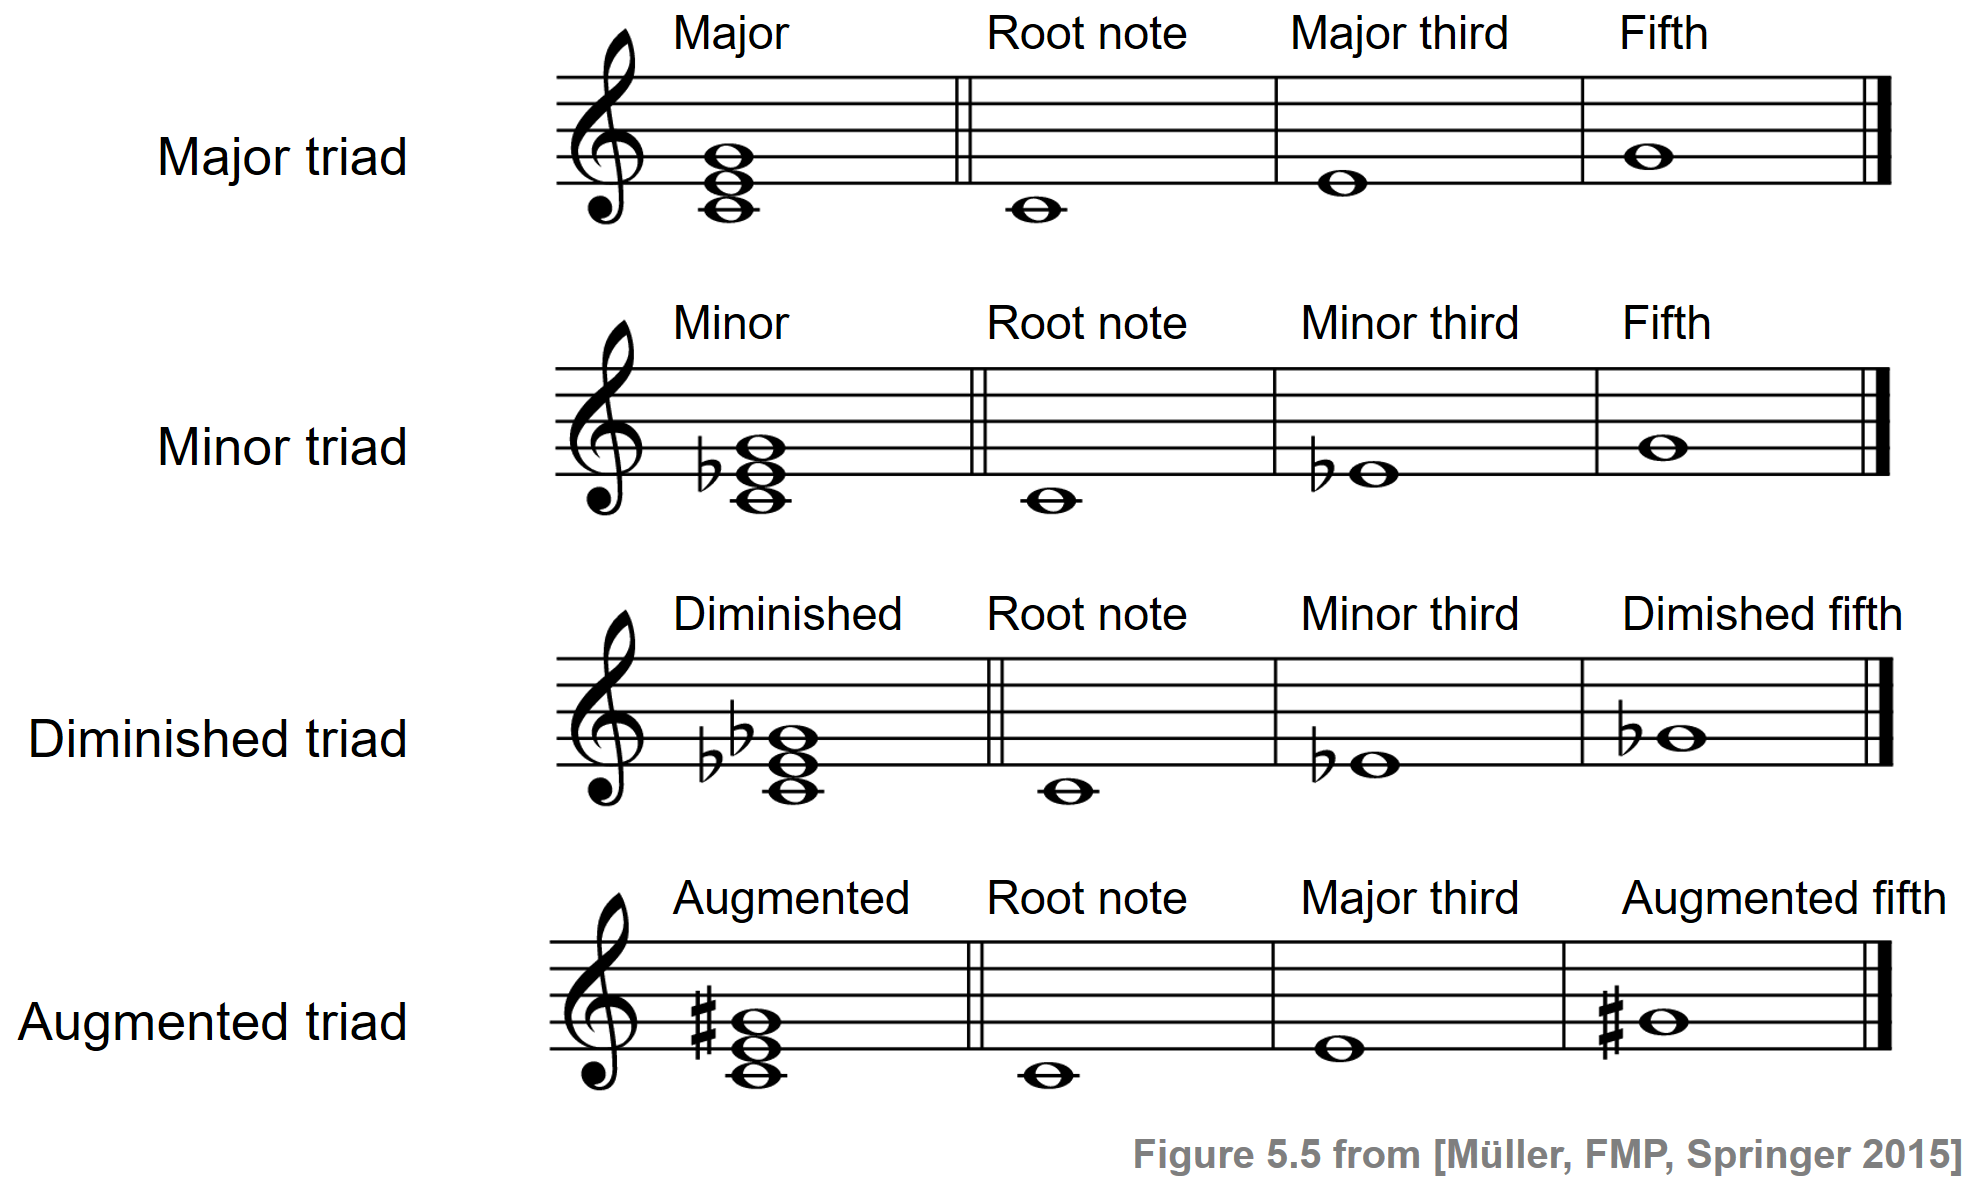

In [29]:
ipd.Image("../img/6.chord_recognition/FMP_C5_F05_triad.png",width=600)

- 각 화음 유형은 서로 다른 근음에 따라 연주될 수 있다.

- 주어진 근음에 관계없이 4개의 3화음 형식은 청취자가 인식하는 방식에 따라 질이 다르다.
- 장3도와 완전5도로 구성된 **장**(**major**)3화음은 협화음정을 구성한다. 또한 세 구성음의 부분음 사이에 일치도가 높다. 그 결과 장3화음의 소리는 종종 일관되고 유쾌하며 행복한 것으로 묘사된다.
- 두 번째 음의 피치를 반음 낮추면 장3화음이 **단**(**minor**)3화음으로 바뀐다. 여전히 협화음이 있고 일관성 있는 것으로 간주되지만 단화음은 종종 슬프고 우울하거나 침울한 것으로 인식된다. 
- **감**(**diminished**)3화음 및 **증**(**augmented**)3화음의 경우 구성음의 부분음이 거의 겹치지 않으며 이러한 3화음은 일반적으로 불협화음 및 불안정한 것으로 인식된다. 종종 감 및 증3화음은 장화음과 단화음을 기반으로 보다 안정적인 화성 사이를 이동하기 위해 전환 악절에서 사용된다.

- 다음은 피아노로 연주되는 $\mathrm{C}$-major 및 $\mathrm{C}$-minor 화음의 사운드 예이다.

- 정현파를 사용하여 네 가지 화음 유형 각각의 합성(sythetic) 변형을 생성하자.

In [42]:
print("Major triad")
ipd.display(ipd.Audio(filename="../data_FMP/FMP_C5_F05a_C-Major-Triad_AudioLabs.mp3"))

print("Minor triad")
ipd.display(ipd.Audio(filename="../data_FMP/FMP_C5_F05b_C-Minor-Triad_AudioLabs.mp3"))

Major triad


Minor triad


In [36]:
def generate_sinusoid_chord(pitches=[69], duration=1, Fs=4000, amplitude_max=0.5):
    """Generate synthetic sound of chord using sinusoids

    Args:
        pitches (list): List of pitches (MIDI note numbers) (Default value = [69])
        duration (float): Duration (seconds) (Default value = 1)
        Fs (scalar): Sampling rate (Default value = 4000)
        amplitude_max (float): Amplitude (Default value = 0.5)

    Returns:
        x (np.ndarray): Synthesized signal
    """
    N = int(duration * Fs)
    t = np.arange(0, N) / Fs
    x = np.zeros(N)
    for p in pitches:
        omega = 2 ** ((p - 69) / 12) * 440
        x = x + np.sin(2 * np.pi * omega * t)
    x = amplitude_max * x / np.max(x)
    return x

In [37]:
duration = 2
Fs = 4000

pitches = [60, 64, 67]
x = generate_sinusoid_chord(pitches=pitches, duration=duration, Fs=Fs)
print('Major chord', flush=True)
ipd.display(ipd.Audio(data=x, rate=Fs))

pitches = [60, 63, 67]
x = generate_sinusoid_chord(pitches=pitches, duration=duration, Fs=Fs)
print('Minor chord', flush=True)
ipd.display(ipd.Audio(data=x, rate=Fs))

pitches = [60, 63, 66]
x = generate_sinusoid_chord(pitches=pitches, duration=duration, Fs=Fs)
print('Diminished chord', flush=True)
ipd.display(ipd.Audio(data=x, rate=Fs))

pitches = [60, 64, 68]
x = generate_sinusoid_chord(pitches=pitches, duration=duration, Fs=Fs)
print('Augmented chord', flush=True)
ipd.display(ipd.Audio(data=x, rate=Fs))

Major chord


Minor chord


Diminished chord


Augmented chord


## 장화음, 단화음 (Major and Minor Chords)

- 12개의 서로 다른 근음이 있기 때문에 기본적으로 12개의 장3화음과 12개의 단3화음을 형성할 수 있다.

- 다음은 각 화음의 가장 낮은 음이 근음인 3화음의 악보 표현을 보여준다. 또한 피아노 녹음과 각 3화음의 합성 버전을 들어보자.

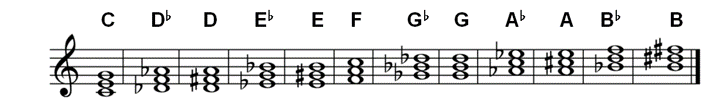

In [44]:
ipd.display(ipd.Image('../img/6.chord_recognition/FMP_C5_F06_major.png'))
ipd.display(ipd.Audio('../data_FMP/FMP_C5_F06_Major-Triads_AudioLabs_NoPedal.mp3'))

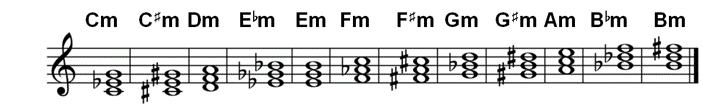

In [50]:
ipd.display(ipd.Image('../img/6.chord_recognition/FMP_C5_F06_minor.png'))
ipd.display(ipd.Audio('../data_FMP/FMP_C5_F06_Minor-Triads_AudioLabs_NoPedal.mp3'))

In [51]:
duration = 1
Fs = 4000

x_major = []
pitches = np.array([60, 64, 67])
for i in range(12):
    x = generate_sinusoid_chord(pitches=pitches+i, duration=duration, Fs=Fs)
    x_major = np.append(x_major, x)

x_minor = []
pitches = np.array([60, 63, 67])
for i in range(12):
    x = generate_sinusoid_chord(pitches=pitches+i, duration=duration, Fs=Fs)
    x_minor = np.append(x_minor, x)

print('Major chords', flush=True)
ipd.display(ipd.Audio(data=x_major, rate=Fs))    
    
print('Minor chords', flush=True)
ipd.display(ipd.Audio(data=x_minor, rate=Fs))

Major chords


Minor chords


- 음 수준에서는 일반적으로 주어진 화음를 실현하기 위한 많은 대안이 있다.

- 화음의 가장 낮은 음(베이스 음)이 근음일 때 화음는 **근음 위치(root position)** 또는 **정상 형식(normal form)** 에 있다고 한다. 근음이 화음에서 연주되는 가장 낮은 음이 아닌 경우 **반전(inverted)** 이라고 한다.

- 다음 그림은 정규 형식, 첫 번째 반전(inversion), 두 번째 반전, 옥타브 더블링(doubling)이 있는 화음 및 깨진 화음 (broken chord) (화음의 음을 차례로 연주할 수 있음)을 보여준다.

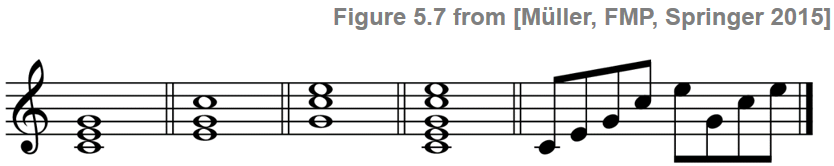

In [9]:
ipd.display(ipd.Image("../img/6.chord_recognition/FMP_C5_F07.png", width=400))
ipd.display(ipd.Audio("../data_FMP/FMP_C5_F07_C-Major-Variants_AudioLabs_NoPedal.mp3"))

In [52]:
Fs = 4000
duration = 2
x = []
x = generate_sinusoid_chord(pitches=[60, 64, 67], duration=duration, Fs=Fs)
x = np.append(x,generate_sinusoid_chord(pitches=[64, 67, 72], duration=duration, Fs=Fs))
x = np.append(x,generate_sinusoid_chord(pitches=[67, 72, 76], duration=duration, Fs=Fs))
x = np.append(x,generate_sinusoid_chord(pitches=[60, 64, 67, 72, 76], duration=duration, Fs=Fs))
duration = duration / 8
broken_chord = [60, 64, 67, 72, 76, 67, 72, 76]
for p in broken_chord:
    x = np.append(x,generate_sinusoid_chord(pitches=[p], duration=duration, Fs=Fs))

ipd.display(ipd.Audio(data=x, rate=Fs))

- 장(major) 화음은 일반적으로 근음의 피치 클래스에 사용되는 것과 동일한 기호로 표시된다.
- 다음부터는 **굵은 글씨**를 사용하여 **화음**의 개념과 피치 클래스 또는 음의 개념을 구분한다.
    - 단(minor) 화음의 경우 "minor"를 나타내는 $\mathbf{m}$ 문자를 추가하는 것을 제외하고는 메이저 화음과 동일한 표기법을 사용하는 경우가 많다.
    - 예를 들어, $\mathbf{C}$로 표시되는 $\mathrm{C}$-major 화음은 피치 클래스 $\mathrm{C}$, $\mathrm{E}$ 및 $\mathrm{G}$가 있는 세 개의 음으로 구성된다. 반면, $\mathbf{Cm}$로 표시되는 $\mathrm{C}$-minor 화음은 $\mathrm{C}$, $\mathrm{E}^\flat$ 및 $\mathrm{G}$로 구성된다.

## 수학적 모형

- 구성 음의 **피치 클래스** 또는 **크로마 값**에 의해 장 또는 단 화음이 결정되는 다소 단순한 관점을 채택하면, 각 3화음을 12개의 크로마 속성으로 구성된 $\{\mathrm{C},\mathrm{C}^\sharp,\mathrm{D},\ldots\mathrm{B}\}$로 생각할 수 있다.
- 동등하게, 3개 원소의 하위 집합은 하위 집합에 의해 인코딩된 크로마 위치에서 $1$ 값의 3개 항목이 있는 **이진 크로마 벡터**로 간주될 수 있다.
- 이 수학적 모형에 기초하여 장3화음 $\mathbf{C}$를 12가지 다른 방식으로 순환 이동함으로써 12개의 장화음을 얻을 수 있다. 마찬가지로 $\mathbf{Cm}$에서 12개의 단화음을 얻는다.
- 각 $24$개의 장 및 단 3화음은 서로 다른 3개 요소 하위 집합으로 이어진다. 즉, 피치 클래스 수준에서 장화음과 단화음은 고유하게 정의된다.
- $24$개의 장, 단화음의 크로마 패턴 결과는 다음 그림과 같다.

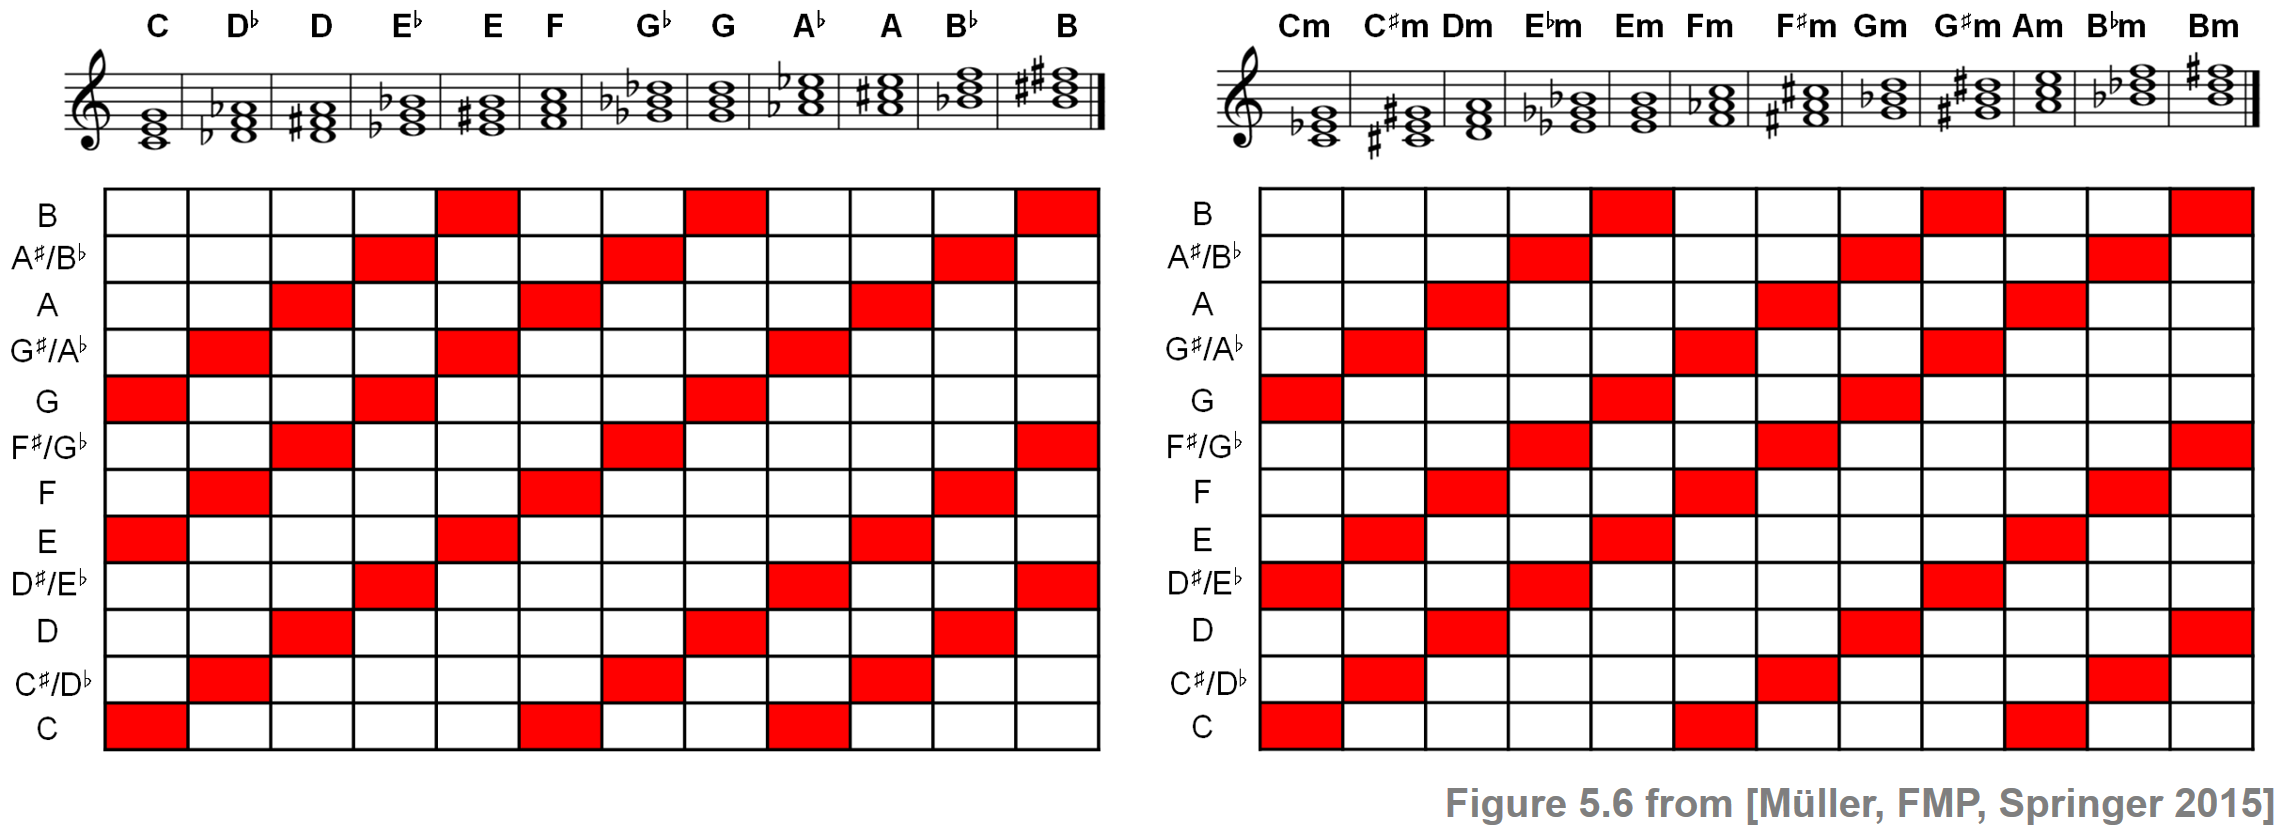

In [58]:
ipd.Image("../img/6.chord_recognition/FMP_C5_F06.png", width=800)

## 7도화음 등 (Seventh Chords and Beyond)

- 3화음은 4개, 5개 또는 그 이상의 음으로 구성된 보다 복잡한 화음의 하위 집합으로도 나타난다.
- 3화음에 3도 음정을 더 쌓으면 **7도 화음**이 된다.
- 7화음에는 여러 종류가 있다.
    - **장7도 화음**은 장3화음 위에 장3도를 쌓아 만든 것으로 주로 팝, 재즈 음악에 사용된다.
    - **dominant 7도 화음** (장3화음 + 단3도)는 다음 화음으로 리졸브(resolve)되는 경향이 강하다.
    - **단7도 화음** (단3화음 + 단3도)은 더 안정적이며 팝/록/재즈와 클래식 음악 모두에 나타난다.
    - **반-감(half-diminished)7도 화음** (감3화음 + 장3도)은 낭만주의 음악(예: Richard Wagner)과 재즈 음악에서 광범위하게 사용된다.
    - **감7화음** (감3화음 + 단3도)은 3개의 연결된 단3도음으로 구성되어 바로크 음악에서 다른 키로 변조하는 데 사용되었다.

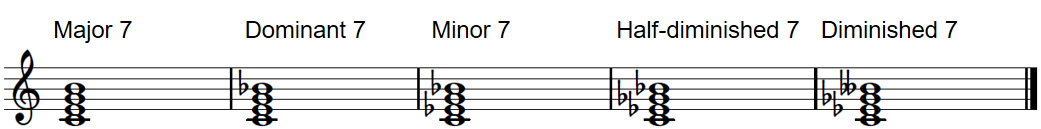

In [65]:
ipd.display(ipd.Image("../img/6.chord_recognition/FMP_C5_SeventhChords.png", width=800))
ipd.display(ipd.Audio("../data_FMP/FMP_C5_F07_Seventh-Chords_AudioLabs_NoPedal.mp3"))

# 음계와 오도권 (Musical Scales and Circle of Fifths)

- 음정과 화음 외에도 **음계**(scale)라고 하는 또 다른 중요한 음악 구조를 설명한다.

- 다소 단순한 관점으로, 음계는 요소가 일반적으로 오름차순 피치로 정렬되는 일련의 음으로 간주될 수 있다.
- **화음**은 **수직 구조**로 생각할 수 있지만 **음계**는 일반적으로 **수평 구조**와 관련이 있다.
- 옥타브 등가의 원리를 가정하면, 음계는 일반적으로 단일 옥타브에 걸쳐 있으며 더 높거나 낮은 옥타브의 단순한 패턴 반복이다.
- 이와 같이 음계는 옥타브 공간을 일정한 수의 **음계 단계**(scale step)로 나눈 것으로 간주할 수 있다. 여기서 각 음계 단계는 연속되는 두 음 사이의 음정이다.

## 크로마틱 스케일 / 반음계 (Chromatic Scale)

- 첫 번째 예로, 한 옥타브가 12개의 음계 단계로 세분되는 12음 평균율 음계를 고려해보자. 이 음계는 **반음계**(chromatic scale)라고도 한다.
- 이 경우 모든 음계 단계는 1반음(또는 $100$ cents) 크기의 동일한 음정에 해당하며, 다음 그림과 같다(enharmonic equivalence로 두 가지 방법으로 표시). 또한 피아노 녹음과 반음계의 합성 버전(다음 코드 셀)을 들어보자.

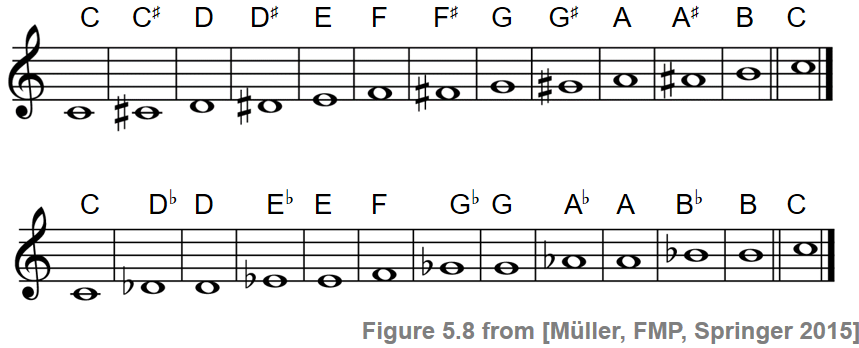

In [68]:
ipd.display(ipd.Image("../img/6.chord_recognition/FMP_C5_F08.png", width=500))
ipd.display(ipd.Audio("../data_FMP/FMP_C5_F08_Chromatic-Scale_AudioLabs.mp3"))

In [70]:
def generate_sinusoid_scale(pitches=[69], duration=0.5, Fs=4000, amplitude_max=0.5):
    """Generate synthetic sound of scale using sinusoids

    Args:
        pitches (list): List of pitchs (MIDI note numbers) (Default value = [69])
        duration (float): Duration (seconds) (Default value = 0.5)
        Fs (scalar): Sampling rate (Default value = 4000)
        amplitude_max (float): Amplitude (Default value = 0.5)

    Returns:
        x (np.ndarray): Synthesized signal
    """
    N = int(duration * Fs)
    t = np.arange(0, N) / Fs
    x = []
    for p in pitches:
        omega = 2 ** ((p - 69) / 12) * 440
        x = np.append(x, np.sin(2 * np.pi * omega * t))
    x = amplitude_max * x / np.max(x)
    return x

In [73]:
duration = 0.2
Fs = 4000
pitches = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
x = generate_sinusoid_scale(pitches=pitches, duration=duration, Fs=Fs)
print('Chromatic scale', flush=True)
ipd.display(ipd.Audio(data=x, rate=Fs))

Chromatic scale


## 장음계, 단음계 (Major and Minor Scale)

- 다음에서는 음계 단계를 반음 단위로 지정할 수 있는 반음계의 하위 집합인 음계만 고려한다. 음계에서 단초(1반음)는 **half step**, 장초(2반음)는 **whole step**이라고도 한다.

- 화음과 마찬가지로 서양 음악 이론에서 특히 중요한 두 가지 음계 유형이 있다.
- 첫 번째 음계 유형은 **장음계**로 알려져 있으며 7개의 음과 반복되는 옥타브로 구성된다. 장음계의 첫 번째 음은 해당 스케일의 **으뜸음 (key note)** 라고 한다. 으뜸음에서 시작해 장음계의 이어지는 음 간의 음정의 시퀀스는 다음과 같다(C4를 으뜸음으로 사용).

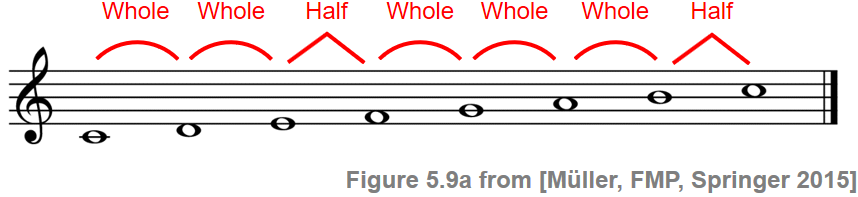

In [74]:
ipd.display(ipd.Image("../img/6.chord_recognition/FMP_C5_F09a.png", width=500))
ipd.display(ipd.Audio("../data_FMP/FMP_C5_F09a_C-Major-Scale_AudioLabs.mp3"))

- 으뜸음의 크로마 이름은 음계의 이름도 결정한다. 예를 들어, $\mathrm{C}$로 시작하는 장음계를 $\mathrm{C}$-major scale이라고 한다. 때로는 굵은 글씨의 $\mathbf{C}$도 음계를 나타내는 약어로 사용된다.
- $\mathrm{C}$-major scale을 순환 이동하여 다른 장음계를 얻을 수 있다. 
- 장음계의 음에는 으뜸음에 상대적인 위치를 지정하기 위해 **음계도**(scale degrees)라고도 하는 이름이 지정된다. 
- 으뜸음는 **"tonic"** 이라고도 하며 음계의 메인 음이다. 음계의 네 번째 음은 **"subdominant"** 라고 하고 다섯 번째 음은 **"dominant"** 라고 한다. 나머지 이름은 다음 그림에 나와있다.

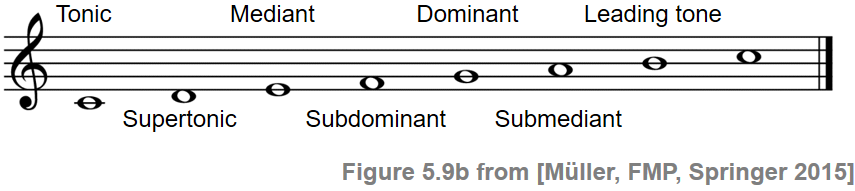

In [76]:
ipd.display(ipd.Image("../img/6.chord_recognition/FMP_C5_F09b.png", width=500))

---
- 두 번째 음계 유형은 **단음계**이다. 장음계와 유사하게 단음계는 7개의 음과 반복되는 옥타브로 구성된다. 그러나 이번에는 음 사이의 음정 순서는 다음과 같다(C4를 으뜸음으로 사용).

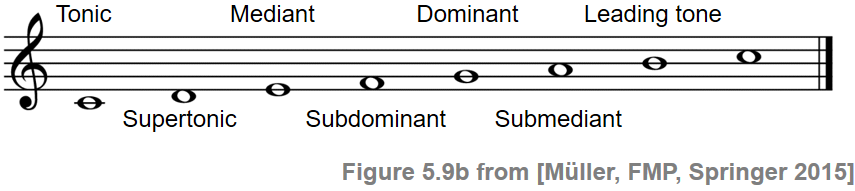

In [79]:
ipd.display(ipd.Image("../img/6.chord_recognition/FMP_C5_F09b.png", width=500))
ipd.display(ipd.Audio("../data_FMP/FMP_C5_F09c_C-Minor-Scale_AudioLabs.mp3"))

- 단음계와 유사한 명명 규칙을 가진 12개의 단음계가 있다. 장음계와 단음계 모두 **온음계(diatonic scale)** 라는 일반 용어에 포함될 수 있다. 이것은 (정의상) 각 옥타브에 대해 5개의 whole-step과 2개의 half-step이 있는 7음 음계이며, 여기서 두 개의 half-step은 두 개 또는 세 개의 whole-step으로 각각 분리된다.

In [80]:
duration = 0.5

x_maj = generate_sinusoid_scale(pitches=[60, 62, 64, 65, 67, 69, 71, 72], duration=duration, Fs=Fs)
x_min = generate_sinusoid_scale(pitches=[60, 62, 63, 65, 67, 68, 70, 72], duration=duration, Fs=Fs)

print('C-major scale', flush=True)
ipd.display(ipd.Audio(data=x_maj, rate=Fs))
print('C-minor scale (natural)', flush=True)
ipd.display(ipd.Audio(data=x_min, rate=Fs))

C-major scale


C-minor scale (natural)


## 기타 음계 (Further Scales)

- 위에서 소개한 단음계(**natural minor scale**이라고도 함) 외에도 **harmonic minor** 및 **melodic minor** scale라는 다른 종류의 단음계들이 있다.
- harmonic minor scale의 음은 natural minor scale와 같지만 7도를 반음 올려 6도와 7도 사이에서 2도가 증가한다. 
- 또한 5음으로 구성된 **펜타토닉 음계(pentatonic scale)**, 6음으로 구성된 **온음 음계(whole tone scale)**, 8음으로 구성된 **옥타토닉 음계(octatonic scale)**(감음 음계) 등이 있다.

Harmonic minor scale (7 pitches + octave)


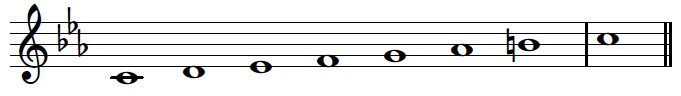

Pentatonic scale (5 pitches + octave)


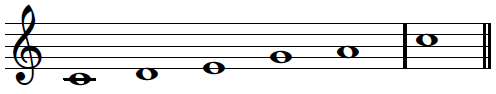

Whole tone scale (6 pitches + octave)


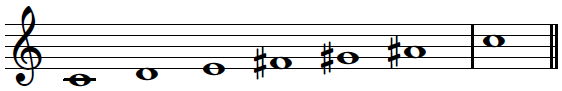

Octatonic scale (8 pitches + octave)


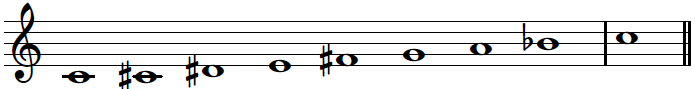

In [86]:
print('Harmonic minor scale (7 pitches + octave)', flush=True)
ipd.display(ipd.Image("../img/6.chord_recognition/FMP_C5_FurtherScales_HarmonicMinor.png", width=400))
ipd.display(ipd.Audio("../data_FMP/FMP_C5S1_Scale-Harmonic-Minor_AudioLabs.mp3"))

print('Pentatonic scale (5 pitches + octave)', flush=True)
ipd.display(ipd.Image("../img/6.chord_recognition/FMP_C5_FurtherScales_Pentatonic.png", width=400))
ipd.display(ipd.Audio("../data_FMP/FMP_C5S1_Scale-Pentatonic_AudioLabs.mp3"))

print('Whole tone scale (6 pitches + octave)', flush=True)
ipd.display(ipd.Image("../img/6.chord_recognition/FMP_C5_FurtherScales_WholeTone.png", width=400))
ipd.display(ipd.Audio("../data_FMP/FMP_C5S1_Scale-Whole-Tone_AudioLabs.mp3"))

print('Octatonic scale (8 pitches + octave)', flush=True)
ipd.display(ipd.Image("../img/6.chord_recognition/FMP_C5_FurtherScales_Octatonic.png", width=400))
ipd.display(ipd.Audio("../data_FMP/FMP_C5S1_Scale-Octatonic_AudioLabs.mp3"))

In [87]:
duration = 0.5

x_mh = generate_sinusoid_scale(pitches=[60, 62, 63, 65, 67, 68, 71, 72], duration=duration, Fs=Fs)
x_p = generate_sinusoid_scale(pitches=[60, 62, 64, 67, 69, 72], duration=duration, Fs=Fs)
x_w = generate_sinusoid_scale(pitches=[60, 62, 64, 66, 68, 70, 72], duration=duration, Fs=Fs)
x_o = generate_sinusoid_scale(pitches=[60, 61, 63, 64, 66, 67, 69, 70, 72], duration=duration, Fs=Fs)

print('Harmonic minor scale (7 pitches + octave)', flush=True)
ipd.display(ipd.Audio(data=x_mh, rate=Fs))
print('Pentatonic scale (5 pitches + octave)', flush=True)
ipd.display(ipd.Audio(data=x_p, rate=Fs))
print('Whole tone scale (6 pitches + octave)', flush=True)
ipd.display(ipd.Audio(data=x_w, rate=Fs))
print('Octatonic scale (8 pitches + octave)', flush=True)
ipd.display(ipd.Audio(data=x_o, rate=Fs))

Harmonic minor scale (7 pitches + octave)


Pentatonic scale (5 pitches + octave)


Whole tone scale (6 pitches + octave)


Octatonic scale (8 pitches + octave)


## 오도권 (Circle of Fifths)

- 온음계(diatonic scales)의 특징 중 하나는 6개의 연속적인 완전5도 음정의 체인으로부터 얻을 수 있다는 것이다.
- 예를 들어, $\mathrm{C}$-major 음계는 $\mathrm{F}$로 시작하는 6개의 완전5도의 오름차순 체인에서 얻는다.
$$\mathrm{F}-\mathrm{C}-\mathrm{G}-\mathrm{D}-\mathrm{A}-\mathrm{E}-\mathrm{B}$$

In [7]:
ipd.Audio("../data_FMP/FMP_C5S1_Scale-Diatonic-Fifths.mp3")

- 옥타브가 아닌 가장 협화음인 5도 음정은 음, 화음, 음계를 연결할 때 특히 중요한 역할을 한다. 5도와 관련된 모든 음은 온음계에 어느 정도 일관성과 균형을 부여하며 전체 음계를 연관시키는 것도 가능하게 한다.

- 반음계의 12개 음과 관련 장음계와 단음계 사이의 관계를 시각적으로 표현한 유명한 **5도권**(**circle of fifths**)이 있다. 직관적으로 5도권은 서로 다른 음계 사이의 "음악적" 유사성의 정도를 반영한다. 두 음계가 원에 가까울수록 음조(tonal) 측면에서 더 많이 공유한다.

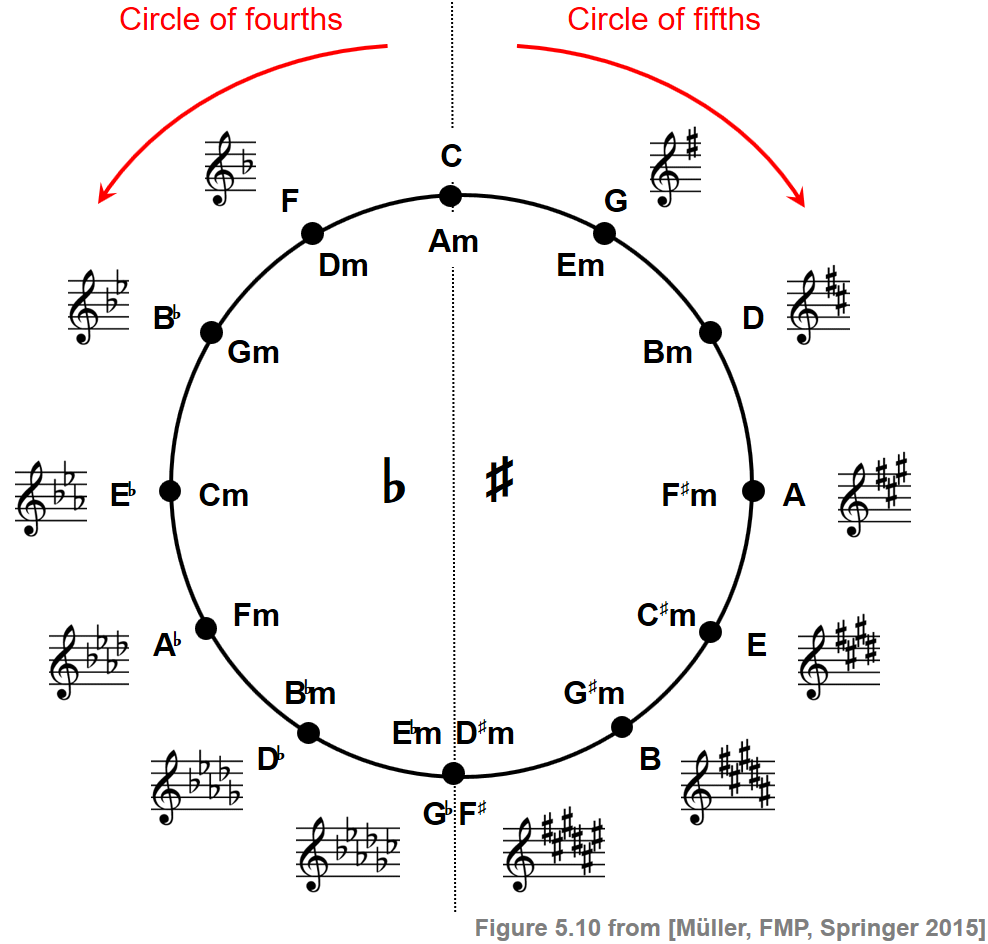

In [6]:
ipd.Image("../img/6.chord_recognition/FMP_C5_F10.png", width=400)

- 다음 녹음에서 각 음계의 으뜸음(key note)은 시계 방향으로 5도의 원을 그리며 연주된다.
$$\mathrm{C}-\mathrm{G}-\mathrm{D}-\mathrm{A}-\mathrm{E}-\mathrm{B}-\mathrm{G}^\flat-\mathrm{D}^\flat-\mathrm{A}^\flat-\mathrm{E}^\flat-\mathrm{B}^\flat-\mathrm{F}$$

In [8]:
ipd.Audio("../data_FMP/FMP_C5_F10_Circle-Fifths.mp3")

## 음조 (Musical Keys)

- 좀 더 공식적으로 5도권은 **음조**(key) 간의 관계를 나타낸다. 이 개념은 장음계와 단음계와 밀접하게 연결되어 있다.

- 음계는 일반적으로 음조에 사용되는 정렬된 음의 집합이지만 음조는 특정 화음 진행에 의해 설정된 중심이다.

- 5도권의 상단에는 $\mathrm{C}$-major key(C장조)가 있다. 피아노 건반의 흰색 건반에 해당하는 해당 $\mathrm{C}$-major scale의 음은 서양 음악 표기법에서 **임시표(accidental)**($\sharp$, $\flat$)가 필요하지 않다. 결과적으로 $\mathrm{C}$ major의 조표에는 플랫이나 샤프가 없다.

- $\mathrm{A}$단조는 해당 음계가 동일한 7개의 음으로 구성되며, $\mathrm{C}$-major와 동일한 음조 시그니쳐를 공유한다.

- 일반적으로 각 장조에는 해당 음계가 동일한 음을 공유하는 단조가 있다. 이 관계를 **상대관계(relative relationship)** 라고 한다.  위에 표시된 5도권에서 장조는 원 외부에 표시되고 해당 상대적 단조는 원 안에 표시된다.

- 원의 상단에 있는 $\mathrm{C}$장조부터 시작하여 **시계 방향**으로 **오름차순 5도**까지 다른 음조를 얻는다.

- 다음 음조는 $\mathrm{G}$장조이며 해당 음계는 $\mathrm{C}$-major 스케일과 6개의 음을 공유한다. $\mathrm{C}$-major의 $\mathrm{F}$만 $\mathrm{G}$-major의 $\mathrm{F}^\sharp$가 된다. 즉 $\mathrm{G}$장조의 조표에 샤프를 도입한다.

- 동일한 종류의 관계가 5도권을 따라 두 개의 후속 음조 또는 음계 사이에 유지된다. 5도를 위로 진행하면 음계의 1음이 변경되고 조표에 1개의 샤프가 추가된다. 이 과정을 평균율에서 12번 반복하는 경우, 원래의 $\mathrm{C}$-major로 돌아가서 원을 닫게 된다.

- 마찬가지로 **오름차순 4도**에 해당하는 내림차순 5도로 **시계 반대 방향으로** 원을 따라 이동할 수 있다. **4도권**으로 진행하면 결과 조표에 플랫이 추가된다.

- 5도권을 따라 정렬된 모든 $24$ 장단음계의 합성 버전을 들어보자.

In [93]:
duration = 0.25

scale_major = np.array([60, 62, 64, 65, 67, 69, 71, 72])
scale_minor = np.array([57, 59, 60, 62, 64, 65, 67, 69])
scale_major_name = ['C','G','D','A','E','B','F$^\sharp$',
                    'D$^\\flat$','A$^\\flat$','E$^\\flat$','B$^\\flat$','F','C',]
scale_minor_name = ['Am','Em','Bm','F$^\sharp$m','C$^\sharp$m','G$^\sharp$m','D$^\sharp$m',
                    'B$^\\flat$m','Fm','Cm','Gm','Dm','Am',]

scale_major_list = []
for i in range(13):
    x = generate_sinusoid_scale(pitches=scale_major, duration=duration, Fs=Fs)
    scale_major_list.append(x)
    scale_major += 7
    if scale_major[-1] > 80:
        scale_major -= 12
        
scale_minor_list = []
for i in range(13):
    x = generate_sinusoid_scale(pitches=scale_minor, duration=duration, Fs=Fs)
    scale_minor_list.append(x)
    scale_minor += 7
    if scale_minor[-1] > 80:
        scale_minor -= 12
        
        
audio_tag_html_list_major = []
for i in range(13):
    audio_tag = ipd.Audio(scale_major_list[i], rate=Fs)
    audio_tag_html = audio_tag._repr_html_().replace('\n', '').strip()
    audio_tag_html = audio_tag_html.replace('<audio ', 
                                            '<audio style="width: 200px; height: 30px;"')  
    audio_tag_html_list_major.append(audio_tag_html)        

audio_tag_html_list_minor = []
for i in range(13):
    audio_tag = ipd.Audio(scale_minor_list[i], rate=Fs)
    audio_tag_html = audio_tag._repr_html_().replace('\n', '').strip()
    audio_tag_html = audio_tag_html.replace('<audio ', 
                                            '<audio style="width: 200px; height: 30px;"')  
    audio_tag_html_list_minor.append(audio_tag_html)    
    
pd.options.display.float_format = '{:,.1f}'.format    
pd.set_option('display.max_colwidth', None)    
df = pd.DataFrame(OrderedDict([
    ('Major', scale_major_name),
    (' ', audio_tag_html_list_major),
    ('Minor', scale_minor_name),
    ('  ', audio_tag_html_list_minor)]))

#df.index = np.arange(0, len(df))
#df = df.T
ipd.HTML(df.to_html(escape=False, justify='center', index=True, header=True))

---

출처: 

- https://www.audiolabs-erlangen.de/resources/MIR/FMP/C5/C5S1_Intervals.html
- https://www.audiolabs-erlangen.de/resources/MIR/FMP/C5/C5S1_Chords.html
- https://www.audiolabs-erlangen.de/resources/MIR/FMP/C5/C5S1_Scales_CircleFifth.html

---

[구글 Colab 링크](https://colab.research.google.com/github/jo-cho/mir_kr/blob/main/Notebooks/6.%20Chord%20Recognition/6.1.Basic_Theory_of_Harmony.ipynb)